# ChatBot Plugin Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for ChatBot Plugin in 2023 is 8914.3240 dollars. It is profitable, with total net profit at 2227.1723 dollars. This put ChatBot Plugin's profit margin at around 25 %.
>* From January to March, revenue growth had been negative (-49% CMGR in February). Growth start to be positive by April, where positive numbers then fluctuate by month. In December the CMGR is around 7% growth. On average, CMGR is also around 7%.
>* On average, ChatBot Plugin have around 55 users each month, with 19 being active. There is a 77.27% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Retention rate for most cohorts falls off completely at some months. January and April cohort are few cohorts that maintain its retention rate, with January cohort having the highest number of active users (17 users and retaining at 5 in December).
>* Most NDR rates are below 100%, with few instances in which cohorts exceed 100%. In June, both February and March cohort have NDR above 100% (118.71% and 128.31%, respectively)..
>* On a per customer basis, the March cohort (12 users) contributes the highest revenue per user by December (181.33), although its initial purchases were low (28.21). On the other hand, February cohort (2 users) saw high purchases in June (176.51 per user), but for the next 6 months user purchases were stagnant. 
>* No negative profit values can be observed for ChatBot Plugin.
>
>Profitability
>* Pre-discounts, ChatBot Plugin consistently had positive profits, with no negative values. Overall positive profits show an increasing trend, especially from February (lowest profit month at 108.9103) to November (highest profit month at 377.5402).
>* ChatBot Plugin generally performs better towards the later part of the year, with a notable spike in September, November, and December (321.8270, 377.5402, and 326.3921, respectively).
>
>Discounting EDA
>* There were 284 invoices for ChatBot Plugin in 2023, 112 of which were applied discounts (~ 39%), showing a balanced approach to maintain margins.
>* Significant profit reductions in November (110.2) and December (82.63) due to discounts.
>* Only 20% discounts are applied to discounted orders, showing a uniform but potentially optimizable approach.
>* Higher order volumes in high-order months like September, November, and December lead to increased profit variability, suggesting potential benefits from slightly lower discounts.
>* Despite reductions, ChatBot Plugin maintains positive profits even after discounts indicating baseline resilience.
>
>Ideal Customer Profile (ICP) EDA
>* To boost business performance, priority should be on the SMB segment, as it contributes in 54.52% of net revenue, 54.72% of sales, and a net profit of 1,225.30 (1,557.16 before discounts). With secondary priority, optimize the contribution from the Strategic segment, which contributes 28.90% of net revenue, 28.42% of sales, and a net profit of 621.03 (745.27 before discounts). Finally, the Enterprise segment, as it yields 16.58% net revenue, 16.86% sales, and a net profit of 380.84 (501.44 before discounts). This balanced approach ensures growth and stability.
>* In the SMB segment, Finance in EMEA, Finance in AMER, Manufacturing in EMEA, Finance in APJ, Energy in AMER, Tech in AMER, Healthcare in AMER are the highest-performing industries. These industries are vital for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations.
>* For the Strategic segment, Finance in AMER, Finance in APJ, Manufacturing in EMEA, Finance in EMEA, Transportation in APJ, Energy in APJ are top-performing. In the Enterprise segment, Finance in EMEA, Finance in APJ, Transportation in EMEA, Misc in AMER, Tech in AMER, Consumer Products in AMER, Manufacturing in EMEA stand out, all being crucial for strategic growth.
>* AMER has notable peak sales and net profits in June, September, and November, but low sales and net profits in February, August, and July, indicating uneven performance throughout the year.
>* EMEA peak sales and net profits in July, September, and November, with no sales in February and lower performance in March and April, resulting in inconsistent monthly results.
>* APJ has peaks in sales and net profits in February, July, and November, but low sales and net profits in January, April, and June, reflecting heavy reliance on peak months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod12 = df.query("Product == 'ChatBot Plugin'")
# then slice product df by year of analysis
prod12_2023=prod12.query('year == 2023')

----

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod12_2023['reg_date'] = prod12_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_11472\2053100804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod12_2023['reg_date'] = prod12_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod12_2023_user = prod12_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod12_2023_user['reg_month']= prod12_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod12_2023_user['key'] = 1
prod12_2023_user = template_table.merge(prod12_2023_user,on='key')
prod12_2023_user =prod12_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod12_2023_user = prod12_2023_user[prod12_2023_user['Month']>=prod12_2023_user['reg_month']]

In [12]:
prod12_2023['Month'] = prod12_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod12_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod12_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod12_2023_user = prod12_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod12_2023_user = prod12_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_11472\175802394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod12_2023['Month'] = prod12_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod12_2023_user['user'] = 1    
prod12_2023_user['new user'] = (prod12_2023_user['reg_month'] == prod12_2023_user['Month']) * 1 
prod12_2023_user['active'] = (prod12_2023_user['Sales'] > 0) * 1   
prod12_2023_user['active_prev'] = (prod12_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod12_2023_user['change_status'] = (prod12_2023_user['active'] != prod12_2023_user['active_prev']) * 1
prod12_2023_user['session_id'] = (prod12_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod12_2023_user['inactive'] = (prod12_2023_user['active'] == 0) * 1
prod12_2023_user['month_inactive'] = (prod12_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#ChatBot Plugin monthly user report (2023)
prod12_2023_report = prod12_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod12_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,64.0000,17.0000,485.5860,459.9668,141.5319,115.9127,17,17,17
2023-02-01,28.0000,7.0000,247.3320,205.2136,108.9103,66.7919,19,2,7
2023-03-01,70.0000,17.0000,442.0840,413.7272,143.7743,115.4175,31,12,14
2023-04-01,75.0000,15.0000,592.9860,531.2868,192.9671,131.2679,38,7,14
2023-05-01,92.0000,18.0000,665.3060,648.5748,202.7574,186.0262,48,10,17
2023-06-01,87.0000,18.0000,1019.1000,984.7000,296.5525,262.1525,54,6,16
2023-07-01,88.0000,18.0000,866.8380,834.7724,282.7764,250.7108,59,5,15
2023-08-01,64.0000,13.0000,732.8600,722.4200,209.2360,198.7960,60,1,12
2023-09-01,134.0000,38.0000,970.6740,915.7572,321.8270,266.9102,75,15,33


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod12_2023_churn = prod12_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod12_2023_churn['old active'] = (prod12_2023_churn['active'] - prod12_2023_churn['new user'])
prod12_2023_churn['user churn'] = ((1 - (prod12_2023_churn['old active'] / prod12_2023_churn['user'].shift(1))) * 100).round()
prod12_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,485.5860,115.9127,17,17,17,0,NaN
2023-02-01,247.3320,66.7919,19,2,7,5,71.0000
2023-03-01,442.0840,115.4175,31,12,14,2,89.0000
2023-04-01,592.9860,131.2679,38,7,14,7,77.0000
2023-05-01,665.3060,186.0262,48,10,17,7,82.0000
2023-06-01,1019.1000,262.1525,54,6,16,10,79.0000
2023-07-01,866.8380,250.7108,59,5,15,10,81.0000
2023-08-01,732.8600,198.7960,60,1,12,11,81.0000
2023-09-01,970.6740,266.9102,75,15,33,18,70.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [16]:
#monthly avg. user churn
prod12_2023_churn[["user", "active", "user churn"]].mean()

user         54.9167
active       18.7500
user churn   77.2727
dtype: float64

In [18]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod12_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 485.5860, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report


,month,Sales,net_profit,CMGR
0,1,485.5860,115.9127,0.0000
1,2,247.3320,66.7919,-49.0653
2,3,442.0840,115.4175,-4.5844
3,4,592.9860,131.2679,6.8873
4,5,665.3060,186.0262,8.1904
5,6,1019.1000,262.1525,15.9819
6,7,866.8380,250.7108,10.1401
7,8,732.8600,198.7960,6.0563
8,9,970.6740,266.9102,9.0438
9,10,636.9900,122.0879,3.0615


In [19]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-2.8985477009623595

In [20]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

6.925207651875997

In [21]:
prod12_2023[['Sales', 'net_profit']].sum()

Sales        8914.3240
net_profit   2227.1723
dtype: float64

In [22]:
# Total monthly profit margin
(2227.1723/ 8914.3240) * 100

24.98419734351141

In [86]:
prod12_2023[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.9455
net_profit,0.9455,1.0000


**Key findings:**
1. On average, ChatBot Plugin have around 55 users each month, with 19 being active. There is a 77.27% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase monthly (35 accounts and 153 units purchased in December). Each month number of new users fluctuates, with certain months having more new users (October has 15 new users, highest for ChatBot Plugin in 2023).
2. From January to March, revenue growth had been negative (-49% CMGR in February). Growth start to be positive by April, where positive numbers then fluctuate by month. In December the CMGR is around 7% growth. On average, CMGR is also around 7%.
3. Total revenue for ChatBot Plugin in 2023 is 8914.3240 dollars. It is profitable, with total net profit at 2227.1723 dollars. This put ChatBot Plugin's profit margin at around 25 %.
4. Based on total monthly data, increase in monthly revenue for Chatbot Plugin seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a strong positive correlation between revenue and profit. 

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod12_2023_user['date']=prod12_2023_user['Month'].dt.to_period('M')
prod12_2023_user['cohort']= prod12_2023_user['reg_month'].dt.to_period('M')
prod12_2023_user['lifetime'] = (prod12_2023_user['date'] - prod12_2023_user['cohort']).apply(attrgetter('n'))

In [15]:
prod12_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1006,Aviva,2023-01-31,2023-01-01,2.0000,40.3000,40.3000,10.8810,10.8810,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1017,Chevron,2023-01-30,2023-01-01,2.0000,4.7680,3.8144,1.4304,0.4768,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod12_cohort = prod12_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod12_cohort ['active rate'] = (prod12_cohort['active'] / prod12_cohort['user']) * 100
prod12_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,17,17,17,100.0000
1,2023-01-01,1,17,0,5,29.4118
2,2023-01-01,2,17,0,2,11.7647
3,2023-01-01,3,17,0,3,17.6471
4,2023-01-01,4,17,0,3,17.6471
...,...,...,...,...,...,...
73,2023-10-01,1,7,0,2,28.5714
74,2023-10-01,2,7,0,1,14.2857
75,2023-11-01,0,5,5,5,100.0000
76,2023-11-01,1,5,0,0,0.0000


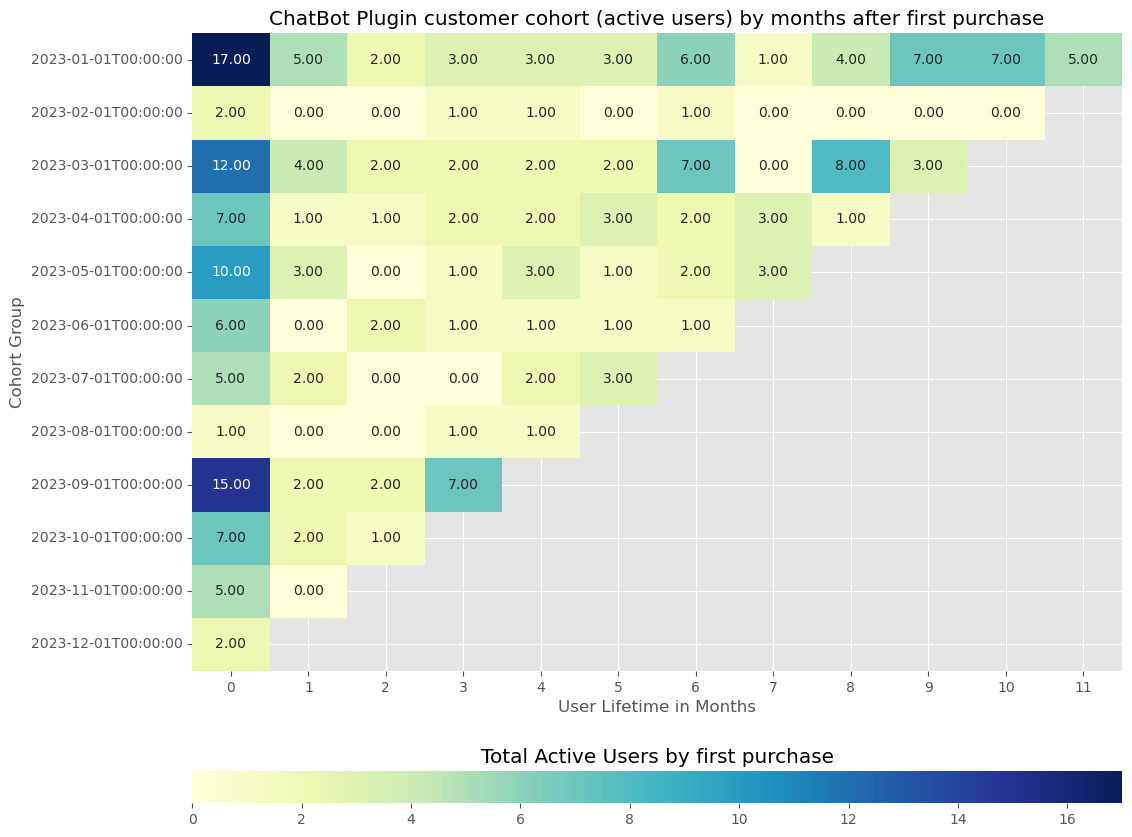

In [19]:
# customer cohort
pivot0 =prod12_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- January cohort (1st cohort) has the highest number of active users, compared to other cohorts. Starting at 17 users and retaining at 5 in December. 
-  Generally, cohorts seem to have relatively low number of active users following their initial purchase. For some cohorts, such as the January, March and September cohort there seems to be higher activity starting in September.

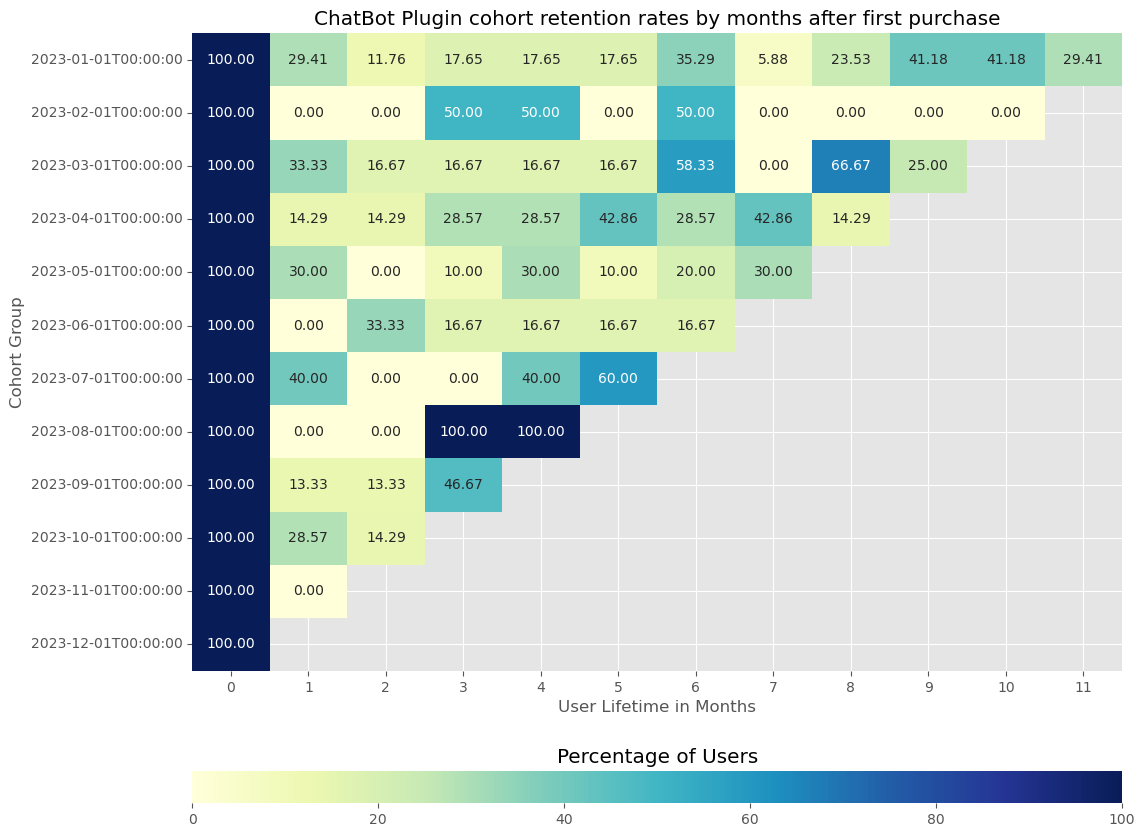

In [19]:
# customer retention
pivot1 =prod12_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- Retention rate for some cohort falls off completely at some months for most cohort.
- January and April cohort are few cohorts that somewhat maintain its retention rate without any falling off completely during its lifetime.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

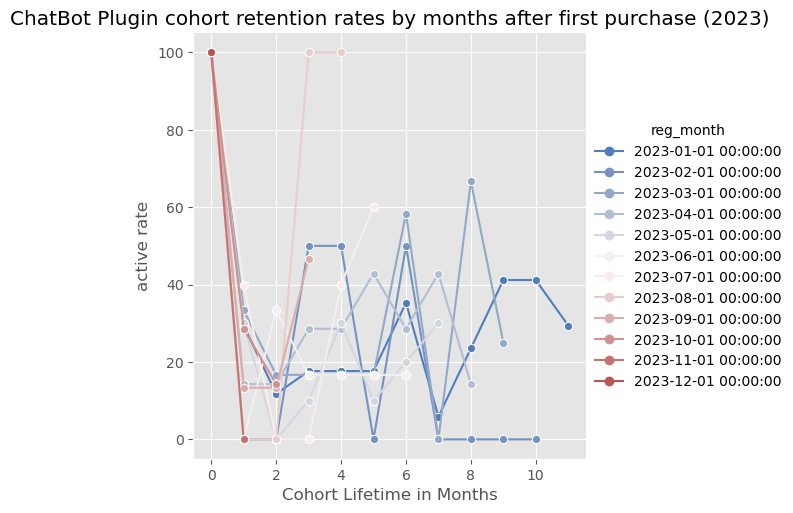

In [20]:
# retention rate lineplots
sns.relplot(data=prod12_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('ChatBot Plugin cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [18]:
prod12_cohort2 =prod12_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

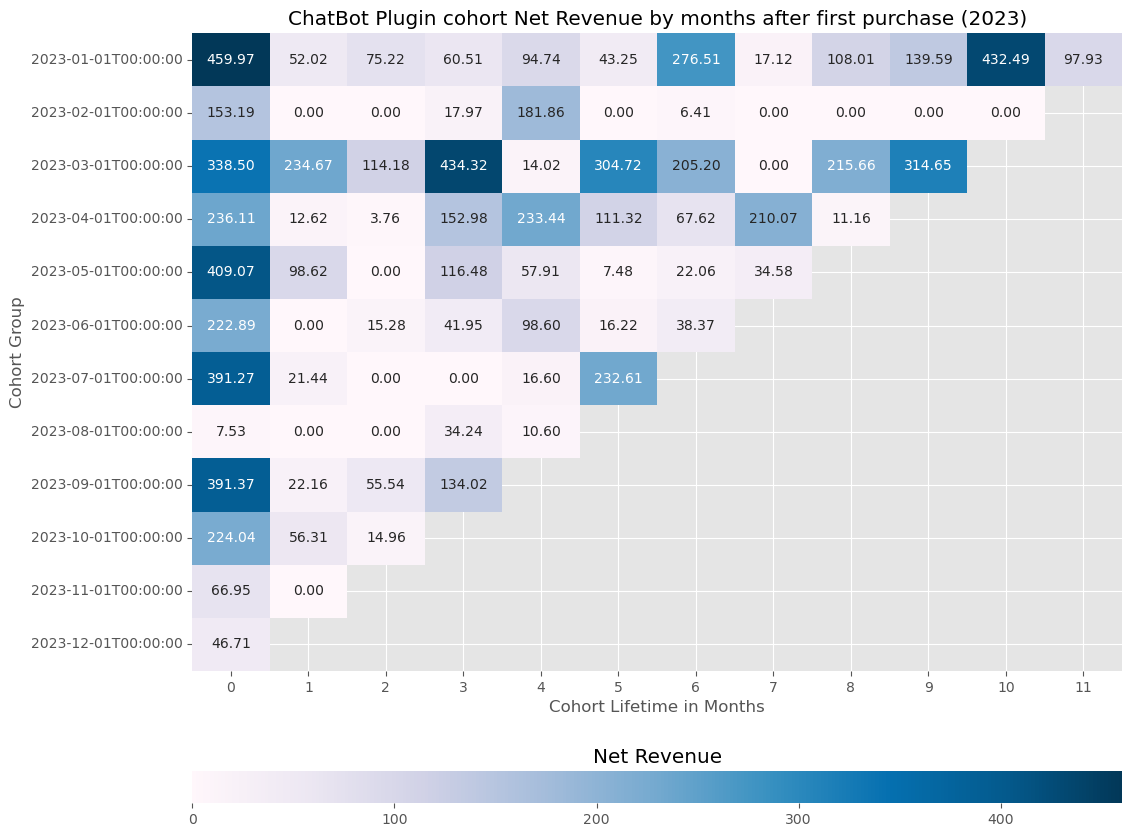

In [22]:
# Net Revenue by Cohort
pivot2 =prod12_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- March cohort have significant subsequent purchases after its initial purchase (338.50), especially in June where the purchase exceed the initial month's purchase (434.32). 
- Though generally most cohort have subsequent purchases, some cohort have months with no purchases, such as the February cohort which have 7 months without purchases.

In [19]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod12_2023_user.loc[prod12_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod12_cohort2 = prod12_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod12_cohort2 ['net dollar retention'] = (prod12_cohort2['discounted_sales'] / prod12_cohort2['ds_max']) * 100

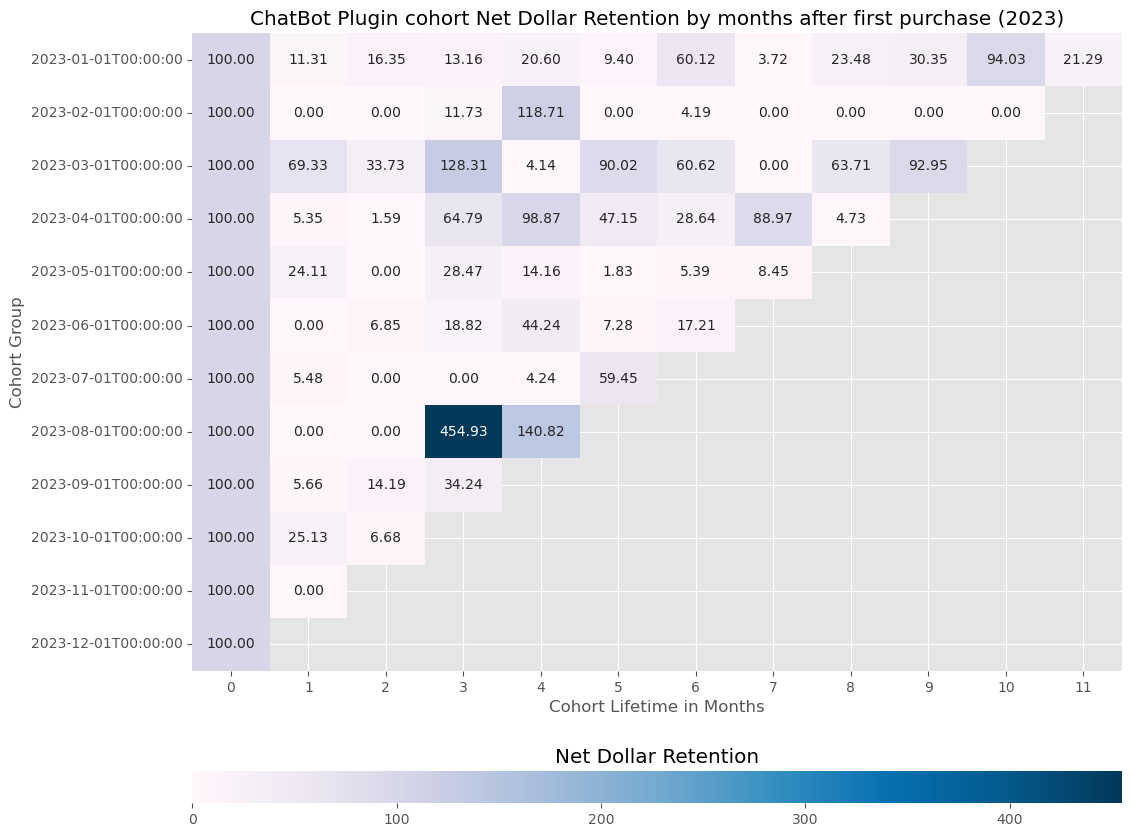

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod12_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

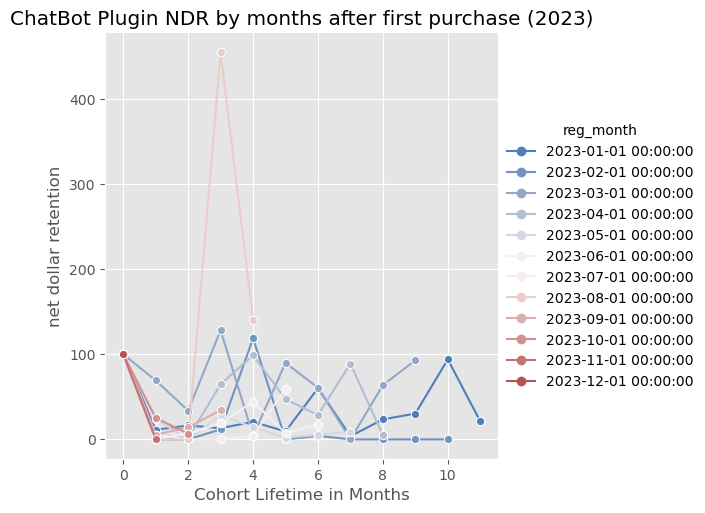

In [24]:
# some data are easier to read with a different chart- NDR lineplots
sns.relplot(data=prod12_cohort2, x="lifetime", y="net dollar retention",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('ChatBot Plugin NDR by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally NDR rates are below 100% for ChatBot Plugin, with some rates at 0 % at certain months for cohorts.
- There are instances which exceed 100%. February cohort 4 months in (118.71%), March cohort 3 months in (128.31%); both are purchases made in June. Most significant (and unusual) is the August cohort, who made a purchase amounting to 454.93% NDR 3 months in the cohort's lifetime (November) and in December NDR is still at 140.82%.

In [20]:
prod12_cohort2 ['cumulative lifetime revenue'] = prod12_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

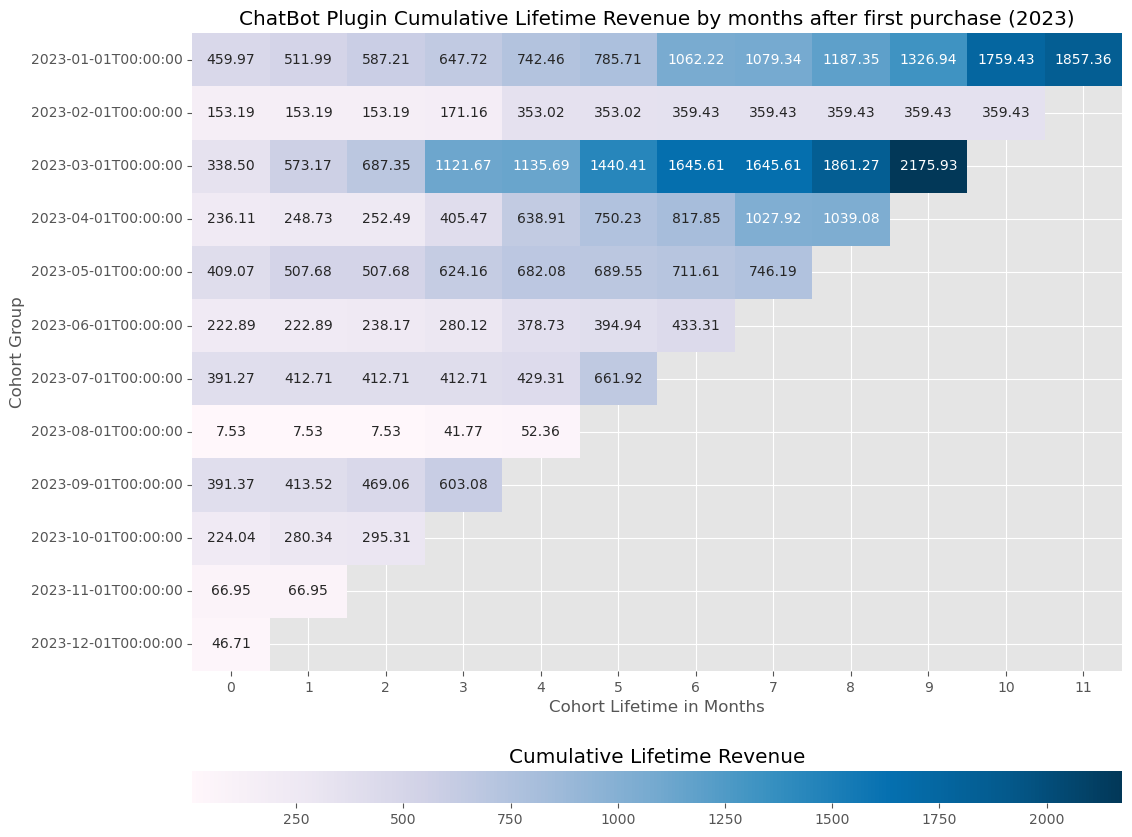

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod12_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

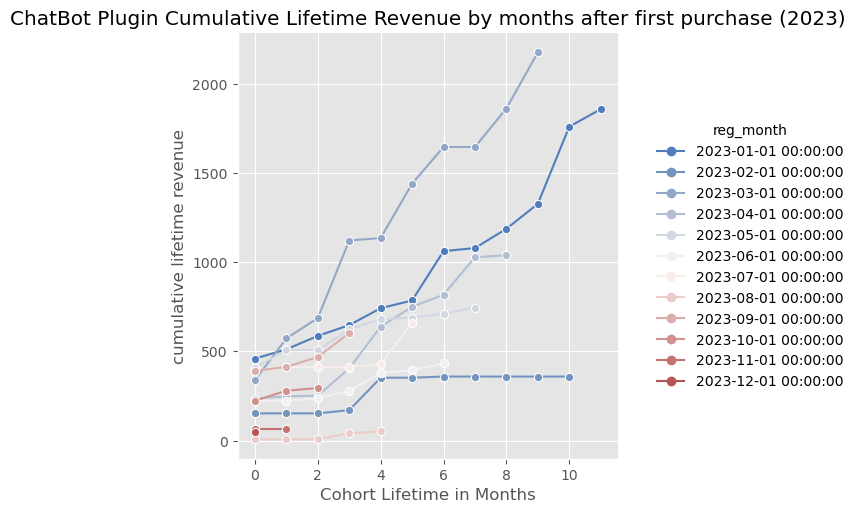

In [ ]:
#  cumulative lifetime revenue lineplots
sns.relplot(data=prod12_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('ChatBot Plugin Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- We can that based on cumulative revenue, March cohort has the most significant upwards trend, generating above 2k in revenue by December. January cohort also follows this upwards trend, though lesser in value, as it generated ~ 1.8k by December. In contrast, we can see that February cohort remains stagnant because it ceases its purchases at some point.

In [21]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod12_2023_user.loc[prod12_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod12_cohort2 = prod12_cohort2.merge(user_max,how='left',on=['reg_month'])
prod12_cohort2 ['customer lifetime revenue'] = (prod12_cohort2['cumulative lifetime revenue'] / prod12_cohort2['user_max'])

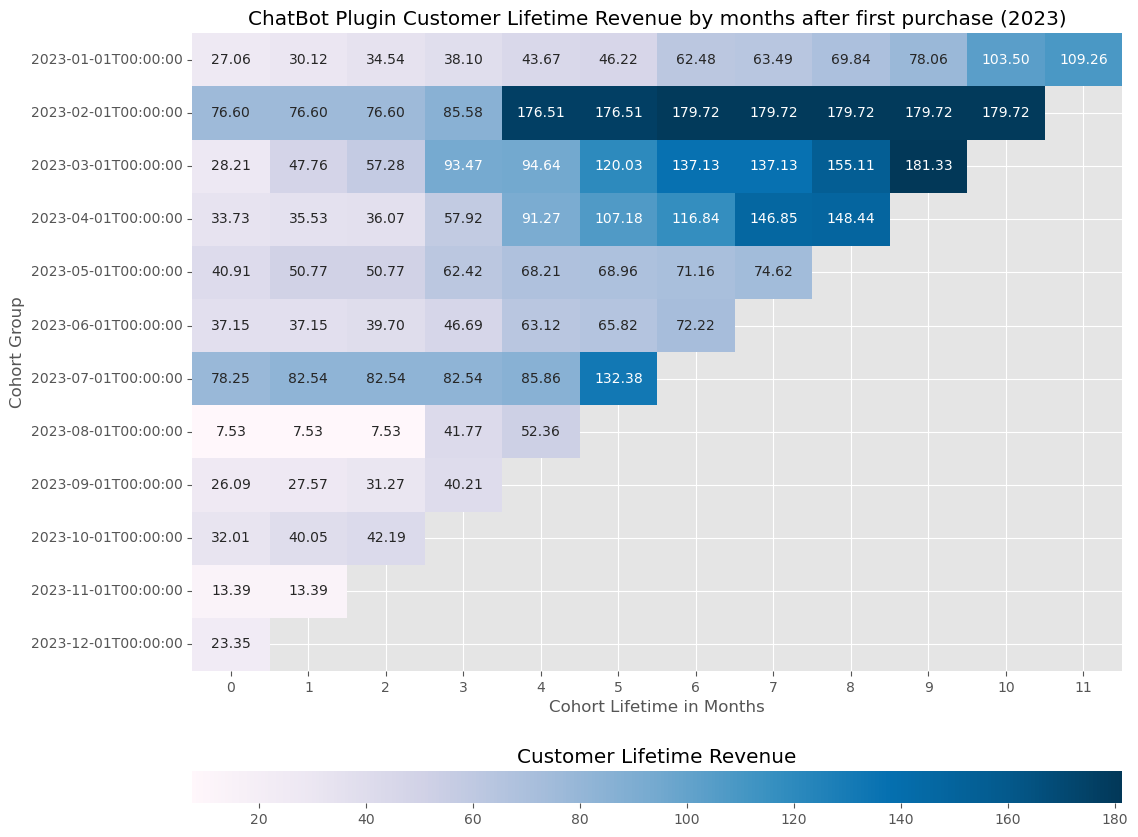

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod12_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

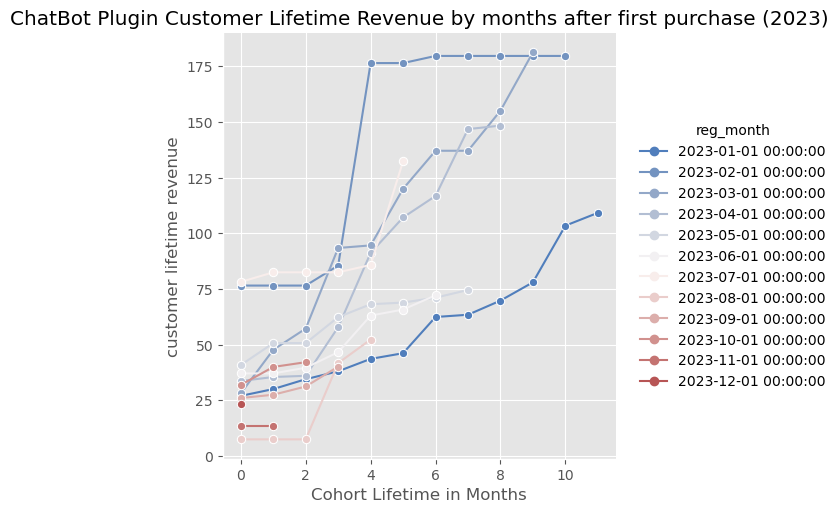

In [25]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod12_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('ChatBot Plugin Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- February cohort saw high purchases in June, and its per-user value increases significantly (176.51), but for the next 6 months user purchases were marginal cumulatively.
- On a per customer basis, the highest can be observed in the March Cohort. Though per user its initial purchases were low (28.21), but with steady subsequent purchases by December it has the highest value per user (181.33).


In [22]:
# CLV - but with net profit
prod12_cohort2 ['cum_net_profit'] = prod12_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod12_cohort2 ['Customer Lifetime Value'] = (prod12_cohort2['cum_net_profit'] / prod12_cohort2['user_max'])

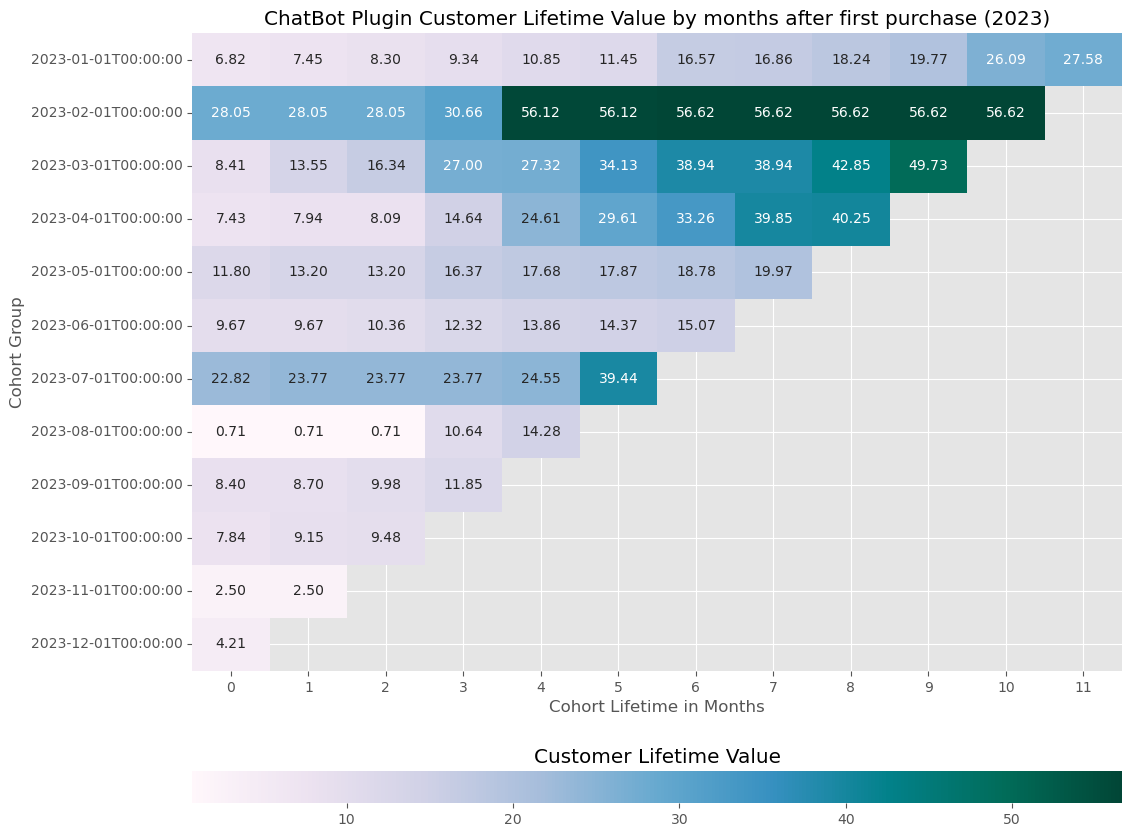

In [30]:
# Customer Lifetime Value, by cohort
pivot6 =prod12_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='ChatBot Plugin Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

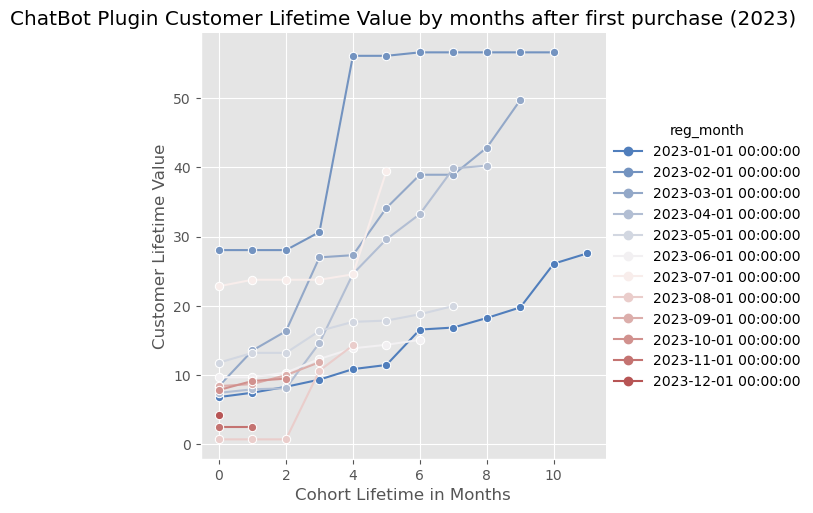

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod12_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('ChatBot Plugin Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are no negative profit values per user in the cohorts, meaning that ChatBot Plugin is contributing profit.
- February cohort provide the highest profits from all the cohorts per user (56.62 made by the third month after the initial purchase, with little to no purchases made from July onwards). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of February cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Retention rate for most cohorts falls off completely at some months. January and April cohort are few cohorts that maintain its retention rate, with January cohort having the highest number of active users (17 users and retaining at 5 in December).
2. Most NDR rates are below 100%, with few instances in which cohorts exceed 100%. In June, both February and March cohort have NDR above 100% (118.71% and 128.31%, respectively).
3. On a per customer basis, the March cohort (12 users) contributes the highest revenue per user by December (181.33), although its initial purchases were low (28.21). On the other hand, February cohort (2 users) saw high purchases in June (176.51 per user), but for the next 6 months user purchases were stagnant. 
4. Profit-wise, February cohort marks the highest on a per-user basis (56.62 in June, with little to no purchases made onwards).
5. No negative profit values can be observed for ChatBot Plugin.

### Profitability

In [23]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod12_2023[prod12_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod12_2023[prod12_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

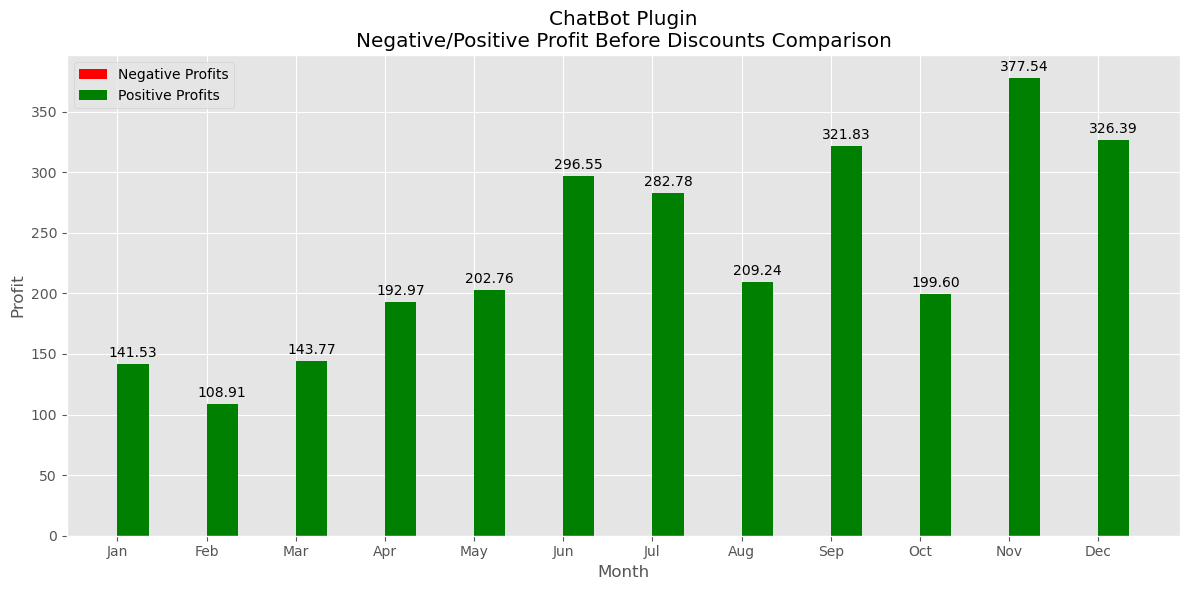

In [25]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('ChatBot Plugin\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Pre-discounts, ChatBot Plugin consistently had positive profits, with no negative values. Overall positive profits show an increasing trend, especially from February (lowest profit month at 108.9103) to November (highest profit month at 377.5402).
2. ChatBot Plugin generally performs better towards the later part of the year, with a notable spike in September, November, and December (321.8270, 377.5402, and 326.3921, respectively).
3. Before discounts, the steady growth and strong year-end performance indicate a healthy profit trajectory for ChatBot Plugin.

### Discounting EDA

In [27]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod12_2023[(prod12_2023['net_profit'] < 0)]
post_discount_positives = prod12_2023[(prod12_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

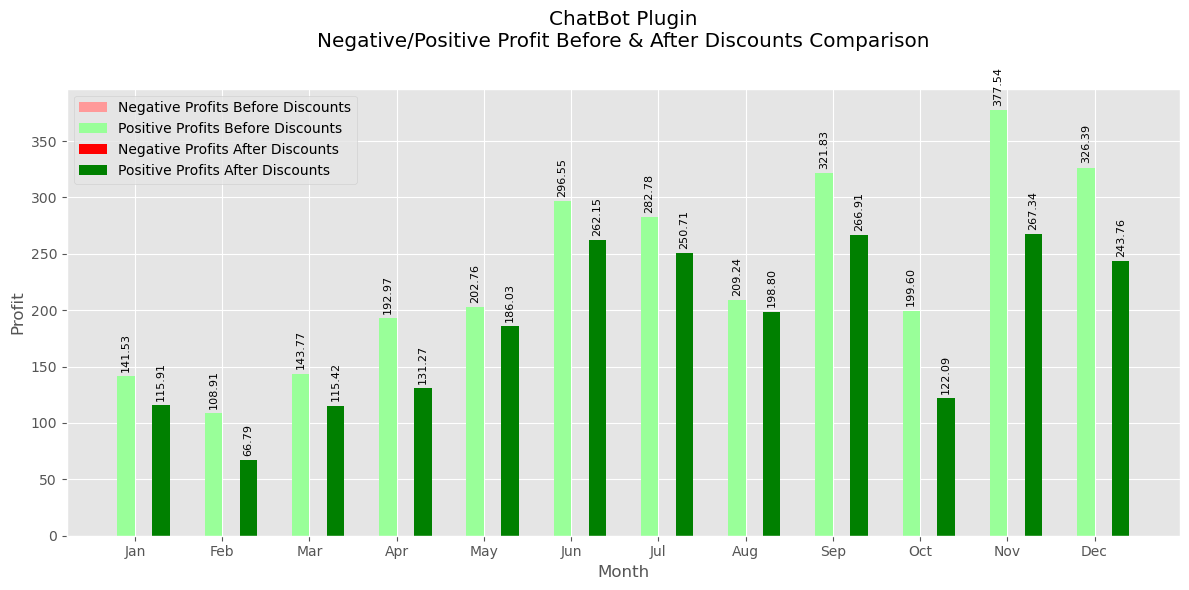

In [29]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('ChatBot Plugin\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

- After discounting has been accounted, ChatBot Plugin still consistently have positive profits without any losses. However, positive profits after discounts show a less consistent increasing trend compared to the data before discounting was accounted for.
- Significant profit reductions were observed in high-profit months like November and December, suggesting that discounts substantially impact peak performance periods. In November, the profit reduction was 110.2 (377.54 - 267.34), the highest among all months. December saw a profit reduction of 82.63 (326.39 - 243.76).
- Despite the reductions due to discounts, ChatBot Plugin consistently shows positive profits every month. This indicates a baseline level of resilience. However, overall reduction highlights the need to carefully assess the balance between discount strategies and profit margins.

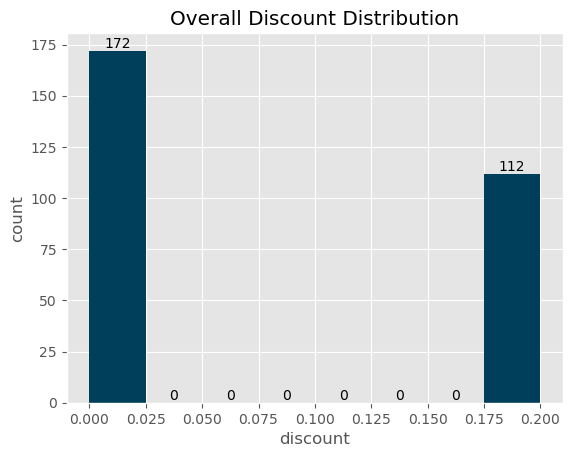

In [32]:
n, bins, patches = plt.hist(data=prod12_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- There were 284 invoices for ChatBot Plugin in 2023, 112 of which were applied discounts (~ 39%). Lower percentage of discounts suggests a controlled approach, possibly aimed at maintaining profit margins while still offering some incentives to attract or retain customers. However, we’ve seen that discounts do have a noticeable impact on overall profits, especially in high-profit months like November and December.
- 112 orders had a 20% discount, the only type offered for ChatBot Plugin. Uniform approach is effective, however there's always room for optimization.

In [ ]:
# Range of Discounts (February, June, September, November)
filtered_df = prod12_2023[prod12_2023['month'].isin([2, 6, 9, 11, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std    mean    min  median     75%      max  count
month Discount                                                       
2     0.0000    0.7908  2.4860 1.7901  2.3435  2.9552   3.4668      4
      0.2000   29.2034 18.9493 0.7120  3.5040 28.0680  52.6320      3
6     0.0000   31.2416 18.7696 1.0904  4.7560 16.6764 111.8240     13
      0.2000    2.2323  2.5926 0.5904  1.7940  3.3572   6.6030      7
9     0.0000   10.2976  8.1139 0.7228  4.8546  6.8932  41.7060     27
      0.2000    2.5181  3.1890 0.5560  3.1850  3.8430   8.3328     15
11    0.0000   11.5834  8.5693 0.7380  3.9738  9.7424  50.9208     24
      0.2000    2.8011  3.8549 0.1548  3.8248  5.4062   8.7384     16
12    0.0000   13.3431  9.5344 0.8680  5.0400 10.2116  45.2226     19
      0.2000    5.4725  3.4780 0.4264  2.3594  3.1082  24.9984     18

> Variability (std): Varying standard deviations across months reflect different business contexts and conditions. Each month presents unique challenges and opportunities that affect profit consistency. For instance, the lower standard deviations in other months suggest more stable and predictable profit patterns.

Data above is the distribution of profit across different discount ranges, for 5 representative months. Reasons choosing particular months are as follows: 
- February: This month has the lowest profit after discounts and can show how the product performs during a low season.
- June: Mid-year performance with a substantial profit before discounts (296.5525) and notable post-discount profit (262.1525).
- September: Represents a steady, high-profit month with a notable difference in profits before (321.8270) and after discounts (266.9102).
- November: Highest profit before discounts (377.5402) and a significant reduction post-discounts (267.3402), indicating peak performance and the impact of discounts.
- December: Similar case with November, this month represent strong year-end performance with a notable reduction in profits post-discounts.

- Both the variability of profits (Std: June 2.2323, September 2.5181, December 5.4725) and the number of orders (June 7, September 15, December 18) in the 20% discount range increase from June to December. This suggests that as more orders are placed, particularly in high-order months like September, November, and December, profits become more variable. A slightly lower discount could maintain high sales while reducing profit variability, especially during these high-order months.
- For most months, the number of non-discounted orders is higher than the number of discounted orders. However we can see that peak periods (September and December) shows a more balanced distribution between non-discounted and discounted orders; showing increased discounting during these periods.

**Key findings:**
1. There were 284 invoices for ChatBot Plugin in 2023, 112 of which were applied discounts (~ 39%), showing a balanced approach to maintain margins.
2. Significant profit reductions in November (110.2) and December (82.63) due to discounts.
3. Only 20% discounts are applied to discounted orders, showing a uniform but potentially optimizable approach.
4. Higher order volumes in high-order months like September, November, and December lead to increased profit variability, suggesting potential benefits from slightly lower discounts.
5. Despite reductions, ChatBot Plugin maintains positive profits even after discounts indicating baseline resilience.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod12_2023_segment = prod12_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod12_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod12_2023_percents = segment_account.merge(prod12_2023_segment,how='left',on=['Segment'])
prod12_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,56,206,1503.2880,1382.6944,501.4384,380.8448
1,SMB,138,619,4877.4760,4545.6168,1557.1612,1225.3020
2,Strategic,62,281,2533.5600,2409.3200,745.2655,621.0255


In [8]:
# calculate percentage of segment's business share by category
prod12_2023_percents['% Account']= prod12_2023_percents['account'] / prod12_2023_percents['account'].sum() *100
prod12_2023_percents['% Quantity']= prod12_2023_percents['Quantity'] / prod12_2023_percents['Quantity'].sum() *100
prod12_2023_percents['% Sales']= prod12_2023_percents['Sales'] / prod12_2023_percents['Sales'].sum() *100
prod12_2023_percents['% Net Revenue']= prod12_2023_percents['discounted_sales'] / prod12_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod12_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod12_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

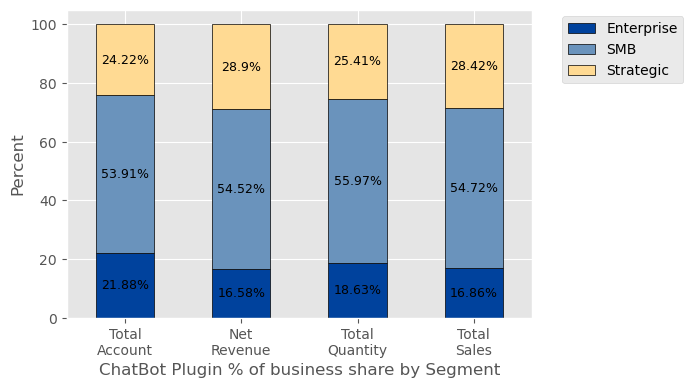

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod12_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ChatBot Plugin % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "ChatBot Plugin" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for ChatBot Plugin based on the last year of company activity.
- SMB segment dominates across most categories, particularly in Net Revenue (54.52%), Total Quantity (55.97%), and Total Sales (54.72%).

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

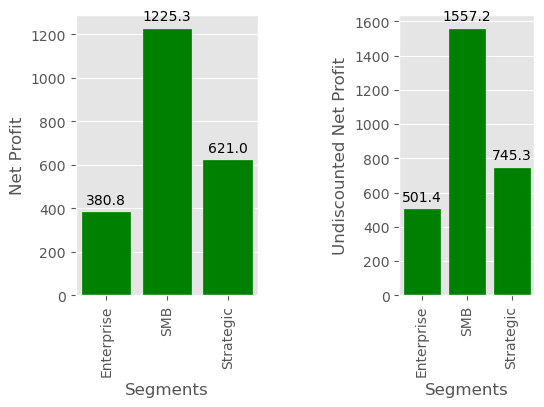

In [36]:
# ChatBot Plugin net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod12_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod12_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment has the highest Net Profit (1225.3) and Undiscounted Net Profit (1557.2).
- SMB segment stands out as the highest-performing segment for the ChatBot Plugin, with dominant shares across Total Accounts, Net Revenue, Total Quantity, and Total Sales, along with the highest net profits.
- While the Enterprise and Strategic segment are underperforming compared to SMB, it would be wiser to dig further before ruling them out.

To enhance business performance, prioritize the SMB segment, which contributes 54.52% to net revenue and 54.72% to sales, with a net profit of 1,225.30 and 1,557.16 before discounts, showing strong financial efficiency. Improve the Enterprise segment, with 16.58% net revenue, 16.86% sales, a net profit of 380.84, and 501.44 before discounts, highlighting potential for profitability. Support the Strategic segment, accounting for 28.90% of net revenue, 28.42% of sales, with a net profit of 621.03 and 745.27 before discounts, indicating room for growth. A balanced strategy focusing on SMBs while enhancing Enterprise and Strategic segments ensures overall business growth and stability.

### Further Inquiries on Segments -----------

In [37]:
# Copy-pasted code for Industry queries within segment
# Industries using ChatBot Plugin within the SMB Segment
prod12_2023_industry_SMB = prod12_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod12_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod12_2023_percents_SMB = SMB_account.merge(prod12_2023_industry_SMB,how='left',on=['Industry'])
prod12_2023_percents_SMB['% Account']= prod12_2023_percents_SMB['account'] / prod12_2023_percents_SMB['account'].sum() *100
prod12_2023_percents_SMB['% Quantity']= prod12_2023_percents_SMB['Quantity'] / prod12_2023_percents_SMB['Quantity'].sum() *100
prod12_2023_percents_SMB['% Sales']= prod12_2023_percents_SMB['Sales'] / prod12_2023_percents_SMB['Sales'].sum() *100
prod12_2023_percents_SMB['% Net Revenue']= prod12_2023_percents_SMB['discounted_sales'] / prod12_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod12_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod12_SMB = percents_SMB.columns.tolist()
# Industries using ChatBot Plugin within the Strategic Segment
prod12_2023_industry_Strategic = prod12_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod12_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod12_2023_percents_Strategic = Strategic_account.merge(prod12_2023_industry_Strategic,how='left',on=['Industry'])
prod12_2023_percents_Strategic['% Account']= prod12_2023_percents_Strategic['account'] / prod12_2023_percents_Strategic['account'].sum() *100
prod12_2023_percents_Strategic['% Quantity']= prod12_2023_percents_Strategic['Quantity'] / prod12_2023_percents_Strategic['Quantity'].sum() *100
prod12_2023_percents_Strategic['% Sales']= prod12_2023_percents_Strategic['Sales'] / prod12_2023_percents_Strategic['Sales'].sum() *100
prod12_2023_percents_Strategic['% Net Revenue']= prod12_2023_percents_Strategic['discounted_sales'] / prod12_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod12_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod12_Strategic = percents_Strategic.columns.tolist()
# Industries using ChatBot Plugin within the Enterprise Segment
prod12_2023_industry_Enterprise = prod12_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod12_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod12_2023_percents_Enterprise = Enterprise_account.merge(prod12_2023_industry_Enterprise,how='left',on=['Industry'])
prod12_2023_percents_Enterprise['% Account']= prod12_2023_percents_Enterprise['account'] / prod12_2023_percents_Enterprise['account'].sum() *100
prod12_2023_percents_Enterprise['% Quantity']= prod12_2023_percents_Enterprise['Quantity'] / prod12_2023_percents_Enterprise['Quantity'].sum() *100
prod12_2023_percents_Enterprise['% Sales']= prod12_2023_percents_Enterprise['Sales'] / prod12_2023_percents_Enterprise['Sales'].sum() *100
prod12_2023_percents_Enterprise['% Net Revenue']= prod12_2023_percents_Enterprise['discounted_sales'] / prod12_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod12_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod12_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

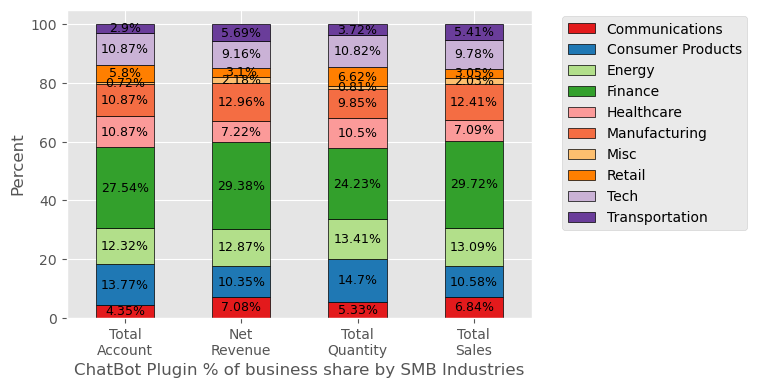

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod12_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ChatBot Plugin % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry dominates in Total Accounts (27.54%), Net Revenue (29.38%), Total Quantity (24.23%), and Total Sales (29.72%).
- Energy and Manufacturing industries also show significant contributions across multiple categories.
- Consumer Products and Retail have moderate shares across the categories.
- Communications, Tech, and Transportation have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

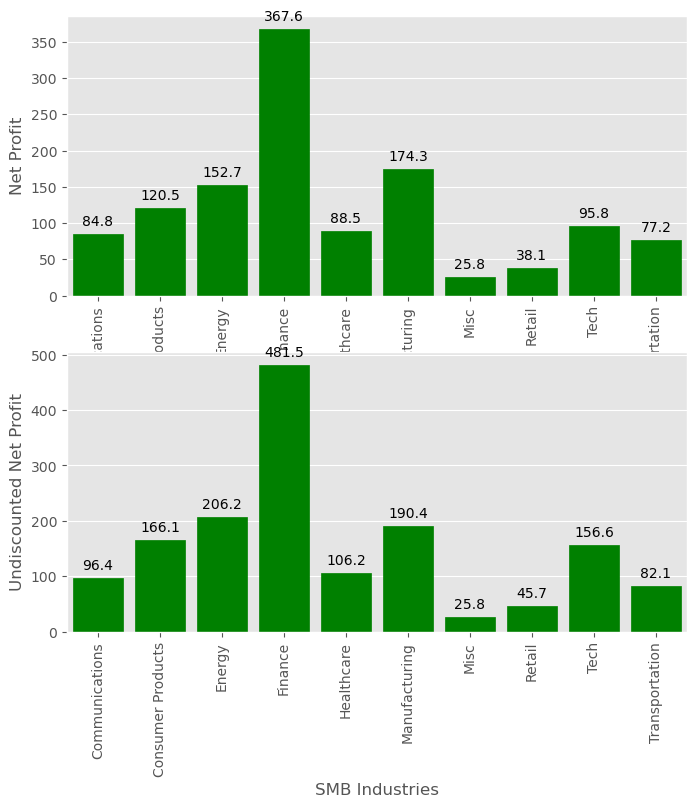

In [39]:
# ChatBot Plugin net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod12_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod12_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance dominates with the highest Net Profit (367.6) and Undiscounted Net Profit (481.5)
- Energy and Manufacturing also show strong financial performance with significant Net and Undiscounted Net Profits.
- Tech and Transportation industries have moderate net profits but still contribute positively.
- Communications and Miscellaneous have the lowest net profits, showing weaker performance within the SMB segment.

In the SMB segment for the ChatBot Plugin, the Finance industry leads with 27.54% of Total Accounts, 29.38% of Net Revenue, 24.23% of Total Quantity, and 29.72% of Total Sales, boasting the highest Net Profit (367.6) and Undiscounted Net Profit (481.5). Energy and Manufacturing also perform well, contributing 12.87% and 12.96% to Net Revenue, with Net Profits of 152.7 and 174.3, and Undiscounted Net Profits of 206.2 and 190.4, respectively. Tech and Transportation have moderate positive contributions, with Net Profits of 95.8 and 118.6, and Undiscounted Net Profits of 156.6 and 146.9. In contrast, Communications and Miscellaneous show weaker performance, with lower Net Profits of 25.8 each, despite contributing 7.08% and 0.81% to Net Revenue.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

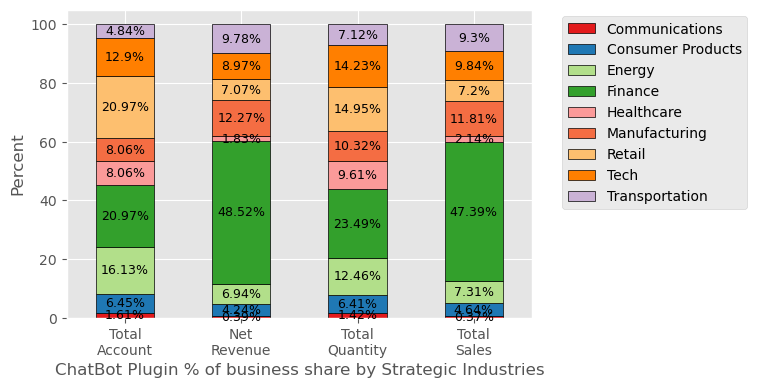

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod12_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ChatBot Plugin % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry dominates in Net Revenue (48.52%), Total Quantity (23.49%), and Total Sales (47.39%).
- Manufacturing and Tech industries also show significant contributions across multiple categories.
- Retail and Energy have notable shares across the categories.
- Communications, Consumer Products, and Healthcare have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

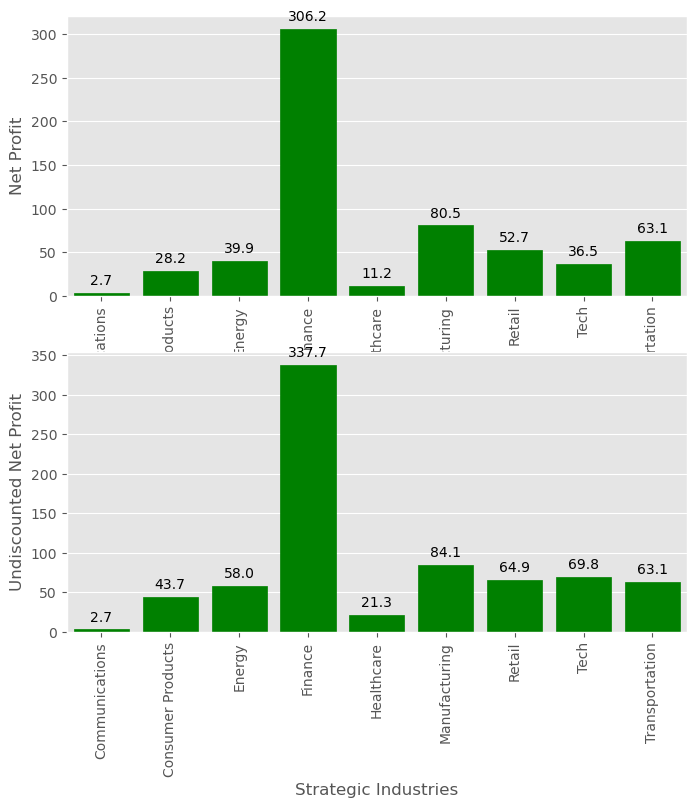

In [41]:
# ChatBot Plugin net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod12_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod12_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance dominates with the highest Net Profit (306.2) and Undiscounted Net Profit (337.7).
- Manufacturing shows strong financial performance with a Net Profit of 80.5 and an Undiscounted Net Profit of 84.1.
- Retail, Tech, and Transportation have positive contributions with Net Profits of 52.7, 36.5, and 63.1, respectively.
- Energy also shows moderate performance with a Net Profit of 39.9 and an Undiscounted Net Profit of 58.0.
- Communications, Consumer Products, and Healthcare have lower net profits, indicating weaker performance within the Strategic segment.

In the Strategic segment for the ChatBot Plugin, the Finance industry leads with 48.52% of Net Revenue, 23.49% of Total Quantity, and 47.39% of Total Sales, boasting the highest Net Profit (306.2) and Undiscounted Net Profit (337.7). The Manufacturing industry also performs well, contributing 12.27% to Net Revenue, with a Net Profit of 80.5 and an Undiscounted Net Profit of 84.1. Retail, Tech, and Transportation contribute positively with moderate net profits. However, the Communications, Consumer Products, and Healthcare industries show weaker financial performance with lower net profits.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

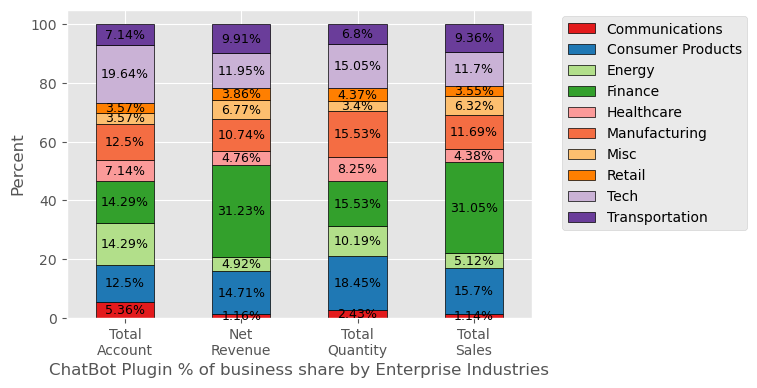

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod12_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('ChatBot Plugin % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Finance industry dominates in Net Revenue (31.23%), Total Quantity (15.53%), and Total Sales (31.05%).
- Consumer Products and Tech industries show significant contributions across multiple categories.
- Manufacturing, Transportation, and Energy have notable shares across the categories.
- Communications, Healthcare, and Retail have lower percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

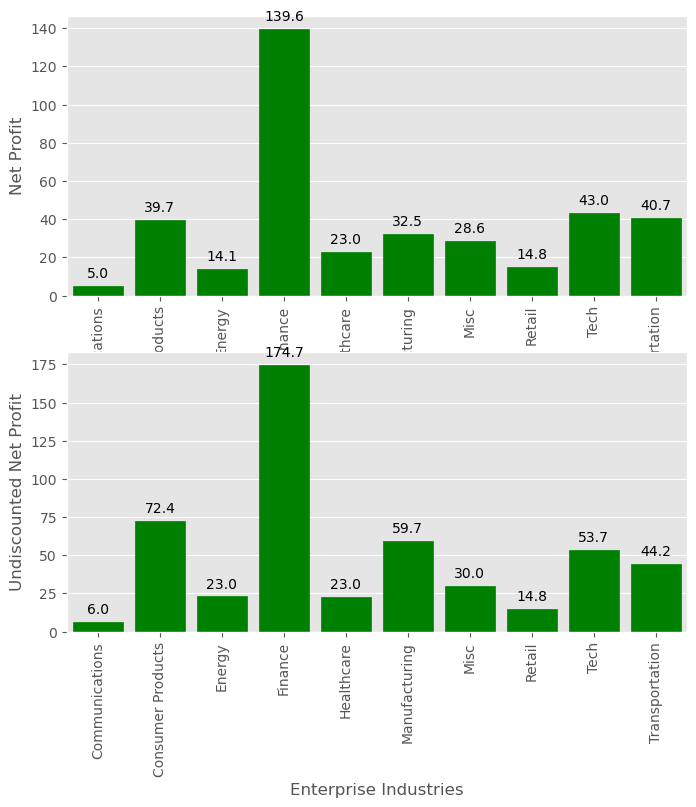

In [43]:
# ChatBot Plugin net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod12_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod12_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance dominates with the highest Net Profit (139.6) and Undiscounted Net Profit (174.7).
- Tech and Consumer Products show strong financial performance with significant Net and Undiscounted Net Profits.
- Transportation and Manufacturing industries also contribute positively with moderate Net and Undiscounted Net Profits.
- Communications, Healthcare, and Retail have lower net profits, indicating weaker performance within the Enterprise segment.

In the Enterprise segment for the ChatBot Plugin, the Finance industry leads, contributing 31.23% of Net Revenue, 31.05% of Total Sales, and achieving the highest Net Profit (139.6) and Undiscounted Net Profit (174.7). Tech and Consumer Products also perform well, contributing significantly to net and undiscounted profits. Transportation and Manufacturing show positive contributions with moderate net profits, while Communications, Healthcare, and Retail display weaker financial performance with lower net profits.

**Key findings:**
1. To boost business performance, priority should be on the SMB segment, as it contributes in 54.52% of net revenue, 54.72% of sales, and a net profit of 1,225.30 (1,557.16 before discounts). With secondary priority, optimize the contribution from the Strategic segment, which contributes 28.90% of net revenue, 28.42% of sales, and a net profit of 621.03 (745.27 before discounts). Finally, the Enterprise segment, as it yields 16.58% net revenue, 16.86% sales, and a net profit of 380.84 (501.44 before discounts). This balanced approach ensures growth and stability.

### Regional EDA

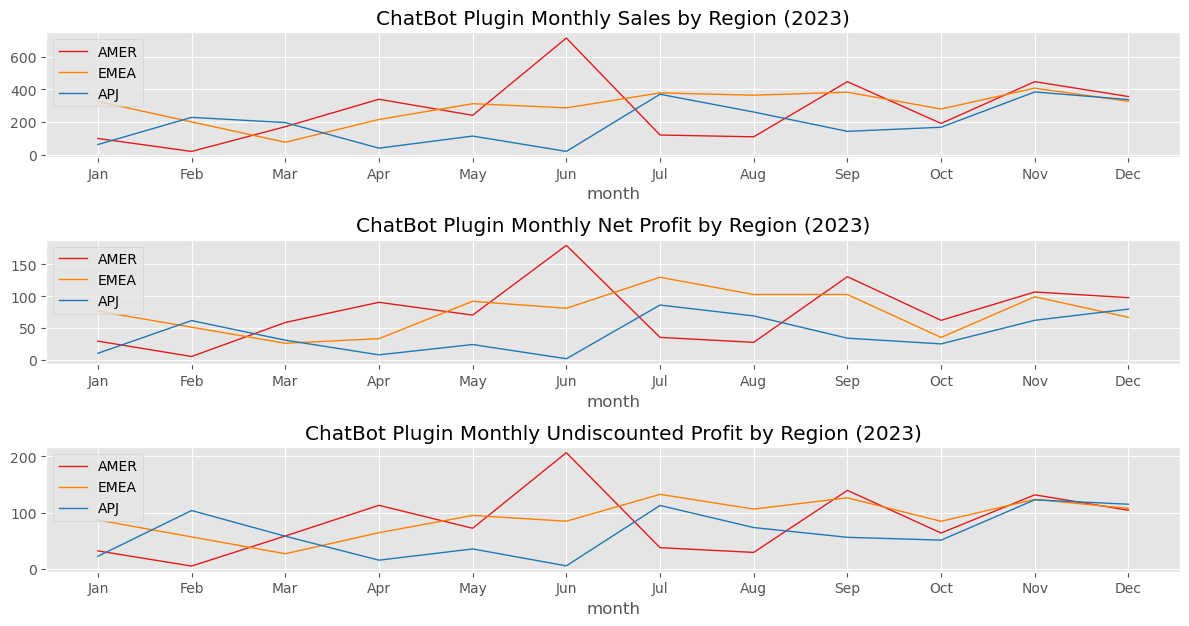

In [7]:
# ChatBot Plugin Monthly Income EDA by Region (2023)
prod12_region_month = prod12_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod12_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod12_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod12_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('ChatBot Plugin Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod12_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod12_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod12_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('ChatBot Plugin Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod12_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod12_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod12_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('ChatBot Plugin Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

For all regions—AMER, EMEA, and APJ—the data reveals peaks in certain months and inconsistencies in performance. This suggests a need for more balanced and stable strategies year-round to ensure consistent growth and profitability across all months.
- In the AMER region, notable peak sales and net profits occur in June, September, and November. There is low sales and net profit in February, August, and July.
- EMEA has peak sales and net profits in July, September, and November. It has no sales in February and lower performance in March and April, resulting in inconsistent monthly results.
- APJ has peak sales and net profits in February, July, and November. It has low sales and net profit in January, April, and June, showing inconsistent monthly performance, relying heavily on peak months.

Performance Highlights
- Highest Sales: In AMER, June shows the highest sales of $713.38.
- Highest Net Profit: The highest net profit is also seen in AMER in June, with a net profit of $179.58.
- Highest Undiscounted Profit: also June in AMER, at $179.58.

In [8]:
prod12_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,29,98.6360,95.8328,32.1308,29.3276
1,AMER,2,6,19.4700,19.4700,5.2569,5.2569
2,AMER,3,38,170.6300,170.6300,58.5462,58.5462
3,AMER,4,26,338.8140,316.1452,112.9186,90.2498
4,AMER,5,38,240.3520,238.2976,72.2174,70.1630
5,AMER,6,57,713.3800,686.7640,206.1986,179.5826
6,AMER,7,18,119.9200,117.2960,37.8336,35.2096
7,AMER,8,18,108.7920,106.8096,29.4438,27.4614
8,AMER,9,60,446.3440,437.3872,139.4321,130.4753
9,AMER,10,24,190.6640,188.7952,63.8266,61.9578


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

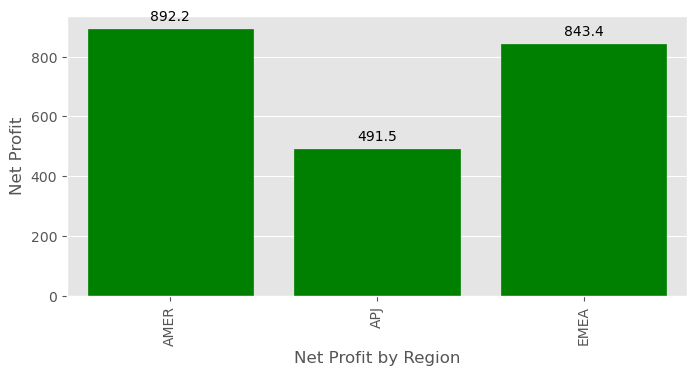

In [8]:
prod12_region = prod12_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod12_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [17]:
prod12_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,421,3248.7940,3147.5812,993.4146,892.2018
1,APJ,269,2317.6160,2036.8928,772.2553,491.5321
2,EMEA,416,3347.9140,3153.1572,1038.1952,843.4384


High-Performing Region
- AMER and EMEA regions stand out as top-performing with the highest sales, discounted sales, and net profit. They managed to achieve significant positive profits even before discounts; however, the substantial discounts applied severely reduce their net profits. indicating that while sales strategies are effective, there may be room to optimize discounting practices to preserve profitability.
- Further analysis of high-performing months could reveal valuable insights to leverage strengths effectively.

Mixed Performance
- APJ region shows lower demand, evident from its lower sales and net profit figures compared to AMER and EMEA. Despite having decent sales figures, the APJ region also experiences a notable drop in net profit after discounts, indicating room for improvement in pricing strategies or cost management.

In [9]:
grouped = prod12_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [10]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [11]:
pd.set_option('display.max_rows', None)
metrics_sorted

,Region,Segment,Industry,total_sales,avg_sales_per_order,total_profit,total_profit before discounts,avg_discount,profit_margin
0,AMER,Enterprise,Communications,7.5800,7.5800,2.9562,2.9562,0.0000,39.0000
1,AMER,Enterprise,Consumer Products,144.8440,20.6920,20.2728,43.1096,0.0857,13.9963
2,AMER,Enterprise,Energy,29.9400,9.9800,8.5992,8.5992,0.0000,28.7214
3,AMER,Enterprise,Finance,16.7200,8.3600,4.2356,4.2356,0.0000,25.3325
4,AMER,Enterprise,Healthcare,8.8000,8.8000,4.2240,4.2240,0.0000,48.0000
5,AMER,Enterprise,Manufacturing,39.8000,19.9000,13.5320,13.5320,0.0000,34.0000
6,AMER,Enterprise,Misc,87.9200,87.9200,26.3760,26.3760,0.0000,30.0000
7,AMER,Enterprise,Retail,23.3600,23.3600,6.0736,6.0736,0.0000,26.0000
8,AMER,Enterprise,Tech,77.1700,11.0243,23.6082,23.6082,0.0000,30.5925
9,AMER,Enterprise,Transportation,12.8400,12.8400,3.4668,3.4668,0.0000,27.0000


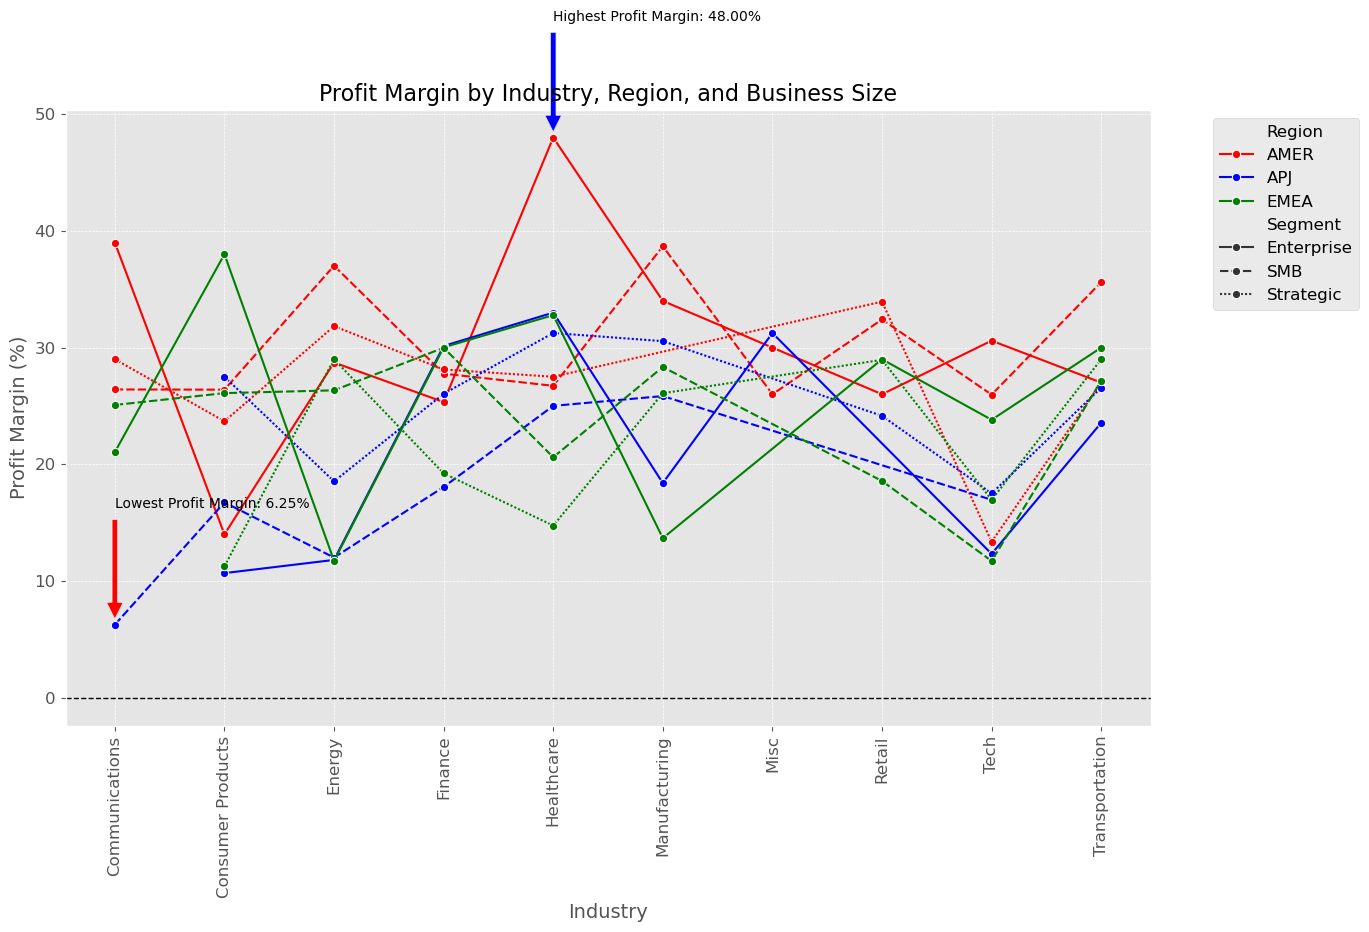

In [13]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [14]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

In [15]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

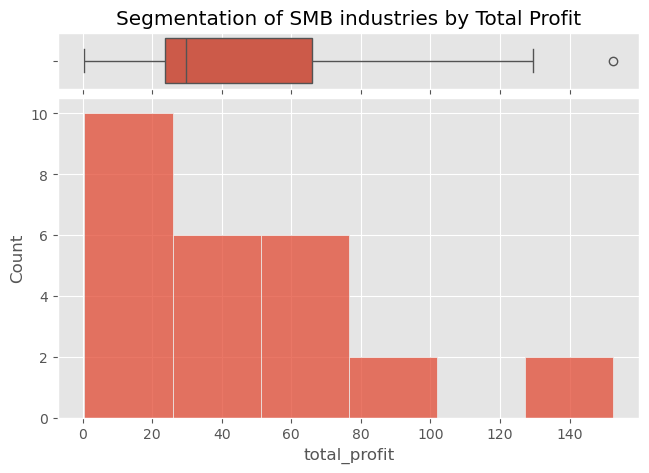

0.0000     0.5580
0.2500    23.7346
0.5000    29.6231
0.7500    66.0674
1.0000   152.4030
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 66.07 in profit
- 3 (Good) : Contributes between 29.62 and 66.07 in profit
- 2 (Marginal) : Contributes between 23.73 and 29.62 in profit
- 1 (Underperforming) : Contributes less than 23.73 in profit


In [16]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [17]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
63,EMEA,SMB,Finance,152.4030,4
13,AMER,SMB,Finance,129.4064,4
65,EMEA,SMB,Manufacturing,99.9998,4
39,APJ,SMB,Finance,85.7930,4
12,AMER,SMB,Energy,71.9862,4
18,AMER,SMB,Tech,66.5841,4
14,AMER,SMB,Healthcare,66.0907,4
61,EMEA,SMB,Consumer Products,65.9977,3
10,AMER,SMB,Communications,55.3438,3
68,EMEA,SMB,Transportation,53.7068,3


In [18]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Finance in AMER, Manufacturing in EMEA, Finance in APJ, Energy in AMER, Tech in AMER, Healthcare in AMER are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Consumer Products in EMEA, Communications in AMER, Transportation in EMEA, Energy in EMEA, Manufacturing in APJ, Energy in APJ all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Communications in EMEA, Consumer Products in AMER, Manufacturing in AMER, Consumer Products in APJ, Misc in AMER, Retail in AMER, Transportation in AMER, Tech in EMEA, Retail in EMEA, Healthcare in APJ, Tech in APJ, Healthcare in EMEA, Communications in

In [19]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

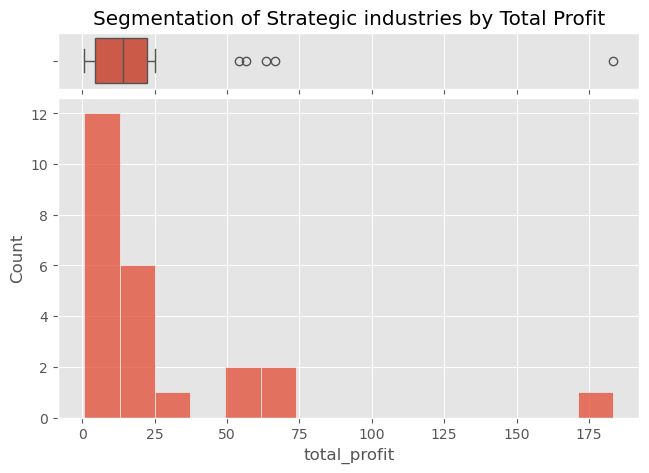

0.0000     0.7704
0.2500     4.4494
0.5000    14.1563
0.7500    22.4489
1.0000   183.2206
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 22.45 in profit
- 3 (Good) : Contributes between 14.16 and 22.45 in profit
- 2 (Marginal) : Contributes between 4.45 and 14.16 in profit
- 1 (Underperforming) : Contributes less than 4.45 in profit


In [20]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [21]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
23,AMER,Strategic,Finance,183.2206,4
45,APJ,Strategic,Finance,66.5338,4
73,EMEA,Strategic,Manufacturing,63.5187,4
71,EMEA,Strategic,Finance,56.4348,4
50,APJ,Strategic,Transportation,54.1600,4
44,APJ,Strategic,Energy,25.2567,4
26,AMER,Strategic,Tech,21.5130,3
25,AMER,Strategic,Retail,20.9589,3
21,AMER,Strategic,Consumer Products,18.6906,3
47,APJ,Strategic,Manufacturing,17.0054,3


In [22]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in AMER, Finance in APJ, Manufacturing in EMEA, Finance in EMEA, Transportation in APJ, Energy in APJ are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Tech in AMER, Retail in AMER, Consumer Products in AMER, Manufacturing in APJ, Retail in APJ, Retail in EMEA all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Tech in EMEA, Energy in EMEA, Consumer Products in APJ, Transportation in EMEA, Energy in AMER, Healthcare in EMEA, Transportation in AMER, Healthcare in AMER, Healthcare in APJ, Communications in AMER, Tech in APJ, Consumer Products in EMEA are underperforming.
These St

In [23]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

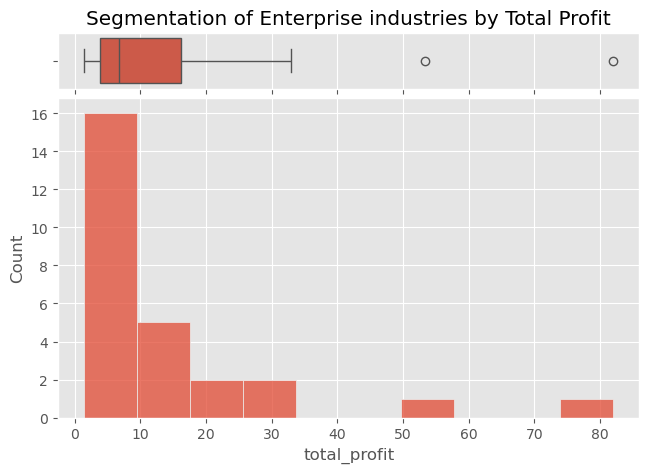

0.0000    1.5004
0.2500    3.8451
0.5000    6.7301
0.7500   16.2458
1.0000   81.9704
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 16.25 in profit
- 3 (Good) : Contributes between 6.73 and 16.25 in profit
- 2 (Marginal) : Contributes between 3.85 and 6.73 in profit
- 1 (Underperforming) : Contributes less than 3.85 in profit


In [24]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [25]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,segmentation score
54,EMEA,Enterprise,Finance,81.9704,4
30,APJ,Enterprise,Finance,53.3700,4
59,EMEA,Enterprise,Transportation,32.9700,4
6,AMER,Enterprise,Misc,26.3760,4
8,AMER,Enterprise,Tech,23.6082,4
1,AMER,Enterprise,Consumer Products,20.2728,4
56,EMEA,Enterprise,Manufacturing,17.4565,4
58,EMEA,Enterprise,Tech,15.0351,3
5,AMER,Enterprise,Manufacturing,13.5320,3
52,EMEA,Enterprise,Consumer Products,13.4520,3


In [26]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Finance in APJ, Transportation in EMEA, Misc in AMER, Tech in AMER, Consumer Products in AMER, Manufacturing in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Tech in EMEA, Manufacturing in AMER, Consumer Products in EMEA, Healthcare in APJ, Retail in EMEA, Energy in AMER all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Healthcare in EMEA, Retail in AMER, Consumer Products in APJ, Tech in APJ, Finance in AMER, Healthcare in AMER, Transportation in APJ, Transportation in AMER, Communications in AMER, Energy in EMEA, Energy in APJ, Misc in APJ, Communication

**Key findings:**
1. AMER has notable peak sales and net profits in June, September, and November, but low sales and net profits in February, August, and July, indicating uneven performance throughout the year.
2. EMEA peak sales and net profits in July, September, and November, with no sales in February and lower performance in March and April, resulting in inconsistent monthly results.
3. APJ has peaks in sales and net profits in February, July, and November, but low sales and net profits in January, April, and June, reflecting heavy reliance on peak months.
4. In the SMB segment, Finance in EMEA, Finance in AMER, Manufacturing in EMEA, Finance in APJ, Energy in AMER, Tech in AMER, Healthcare in AMER are the highest-performing industries. These industries are vital for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations.
5. For the Strategic segment, Finance in AMER, Finance in APJ, Manufacturing in EMEA, Finance in EMEA, Transportation in APJ, Energy in APJ are top-performing. In the Enterprise segment, Finance in EMEA, Finance in APJ, Transportation in EMEA, Misc in AMER, Tech in AMER, Consumer Products in AMER, Manufacturing in EMEA stand out, all being crucial for strategic growth.